<a href="https://colab.research.google.com/github/Srinidhi-15/MyProjects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,...,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2922.000000,2922.000000,2922.000000
mean,1157.248375,-0.334017,0.295477,0.845482,0.102388,-0.084588,0.041536,0.125553,-0.078615,0.039314,...,0.022294,-0.140314,-0.042219,0.013856,0.100449,0.031599,0.045141,0.001299,67.955986,0.000684
std,704.290301,1.393153,1.223387,0.986023,1.324235,1.237915,1.277126,1.121500,1.147635,0.912087,...,0.833485,0.618648,0.354303,0.595526,0.409030,0.478827,0.357938,0.265467,235.093423,0.026158
min,0.000000,-12.168192,-15.732974,-12.389545,-4.657545,-32.092129,-7.465603,-8.945496,-19.176657,-3.110515,...,-4.709977,-4.432106,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.909294,0.000000,0.000000
25%,550.000000,-1.088167,-0.180548,0.290367,-0.762449,-0.603171,-0.714916,-0.311558,-0.197142,-0.479566,...,-0.225683,-0.547154,-0.187037,-0.358373,-0.148071,-0.302827,-0.042663,-0.017615,3.817500,0.000000
50%,1135.000000,-0.458705,0.357519,0.868256,0.140817,-0.140202,-0.209263,0.122413,0.028133,0.010309,...,-0.080783,-0.143518,-0.058762,0.089264,0.118704,0.021763,0.029386,0.022927,13.990000,0.000000
75%,1712.000000,1.086080,0.950014,1.455047,1.002457,0.374203,0.421043,0.593711,0.287463,0.541219,...,0.089006,0.284397,0.070922,0.423843,0.370447,0.307106,0.184856,0.093151,56.965000,0.000000
max,2471.000000,1.685314,6.118940,4.017561,6.013346,10.658654,21.393069,34.303177,3.877662,6.450992,...,14.718212,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [8]:
credit_card_data.shape


(11683, 31)

In [9]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11678,19921,1.208802,-0.401943,0.901086,-0.697416,-1.014073,-0.281932,-0.828187,0.108108,3.018142,...,-0.137886,-0.007707,-0.075264,-0.065906,0.454008,-0.719787,0.054139,0.015084,11.85,0.0
11679,19924,-1.723814,1.389327,1.411353,-0.716019,-1.561864,1.505156,-2.024937,-5.393713,2.156363,...,5.161661,-1.997550,-0.202928,-0.040939,1.221328,1.155446,0.334758,0.104672,155.38,0.0
11680,19926,1.192037,-0.357840,1.002156,-0.558666,-1.017703,-0.321732,-0.780201,0.062111,3.206257,...,-0.138692,0.082080,0.007441,0.018529,0.378177,-0.693956,0.077499,0.025269,8.35,0.0
11681,19927,-7.773912,4.249596,-5.985636,1.450199,-4.709726,-1.302327,-2.807678,4.890516,0.807323,...,0.104104,-0.188352,-0.302390,0.299249,-0.185131,-0.445921,0.143783,-0.061396,89.99,0.0
11682,19929,1.024814,-1.179948,1.702954,-0.833752,-1.598620,1.270610,-1.786000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Visualization

Text(0, 0.5, 'Frequency')

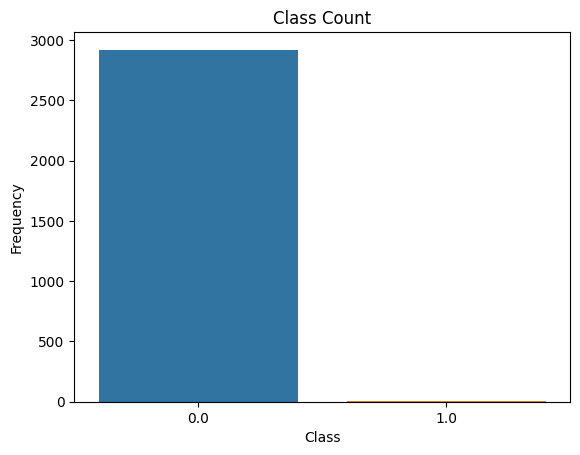

In [ ]:
class_count = pd.value_counts(credit_card_data['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=credit_card_data)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
fraud = credit_card_data[credit_card_data.Class == 1]
normal = credit_card_data[credit_card_data.Class == 0]

Text(0, 0.5, 'Frequency')

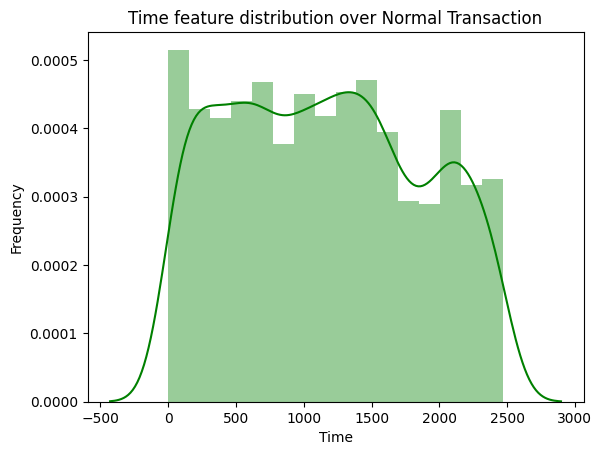

In [ ]:
sns.distplot(normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

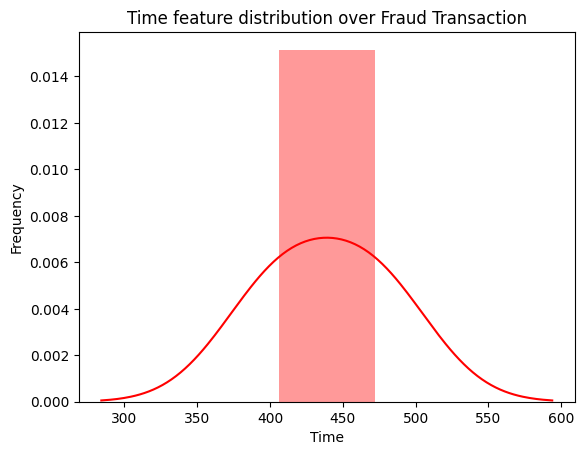

In [ ]:
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

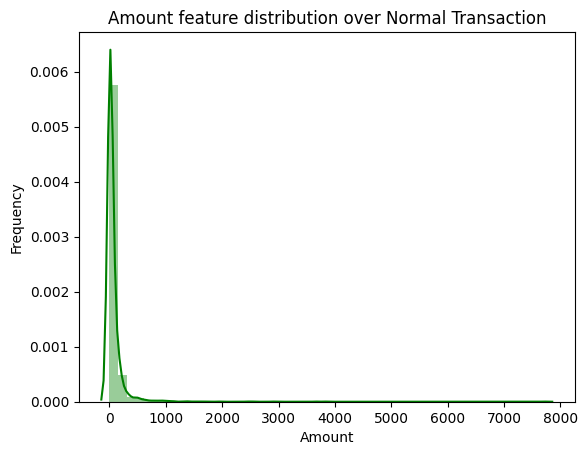

In [ ]:
sns.distplot(normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

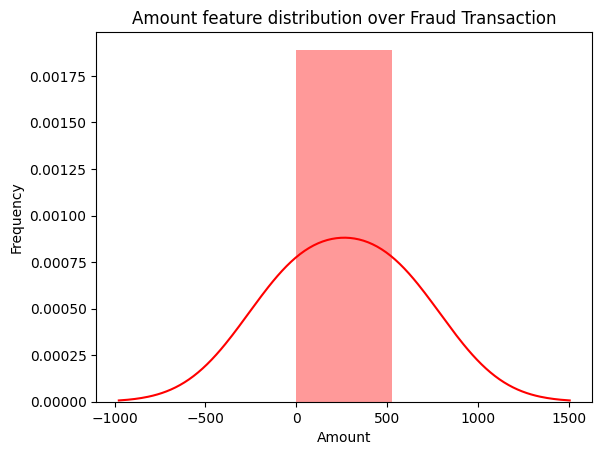

In [ ]:
sns.distplot(fraud.Amount, color='r')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

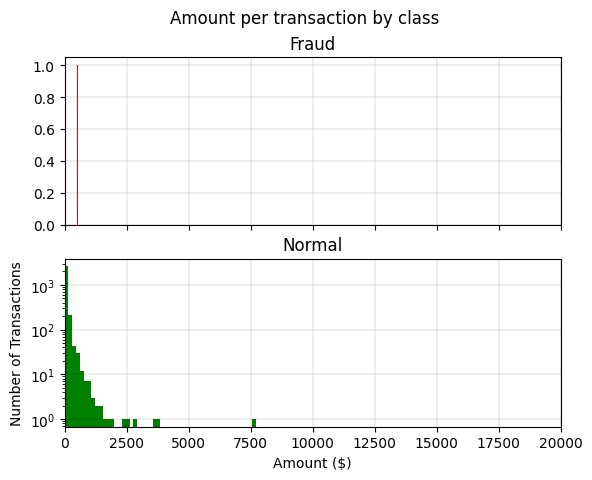

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins, color = 'r')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins, color = 'g')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

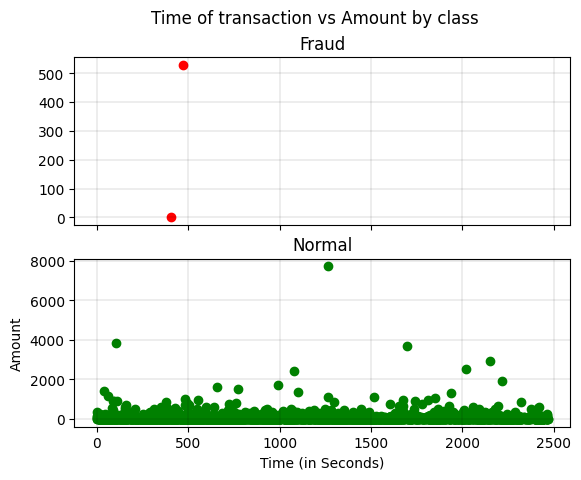

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount, color = 'r')
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount, color = 'g')
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
model_data = credit_card_data.drop(['Time'], axis=1)
model_data['Amount'] = StandardScaler().fit_transform(credit_card_data['Amount'].values.reshape(-1, 1))
model_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.347428,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.277665,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.321846,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.236304,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.008653,0.0


Splitting the data into features and lables


In [ ]:
model_train = model_data.drop("Class", 1).values
model_test = model_data["Class"].values


In [ ]:
from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

oversampler = SMOTE(random_state = 0, n_jobs = -1)
#sampler = SMOTETomek(random_state = 0)
model_train_lr , model_test_lr = oversampler.fit_resample(model_train, model_test)

ValueError: Input y contains NaN.

In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2923 non-null   int64  
 1   V1      2923 non-null   float64
 2   V2      2923 non-null   float64
 3   V3      2923 non-null   float64
 4   V4      2923 non-null   float64
 5   V5      2923 non-null   float64
 6   V6      2923 non-null   float64
 7   V7      2923 non-null   float64
 8   V8      2923 non-null   float64
 9   V9      2923 non-null   float64
 10  V10     2923 non-null   float64
 11  V11     2923 non-null   float64
 12  V12     2923 non-null   float64
 13  V13     2923 non-null   float64
 14  V14     2923 non-null   float64
 15  V15     2923 non-null   float64
 16  V16     2923 non-null   float64
 17  V17     2923 non-null   float64
 18  V18     2923 non-null   float64
 19  V19     2923 non-null   float64
 20  V20     2923 non-null   float64
 21  V21     2923 non-null   float64
 22  

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    2920
1.0       2
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(2920, 31)
(2, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    2920.000000
mean       67.821366
std       235.015671
min         0.000000
25%         3.832500
50%        13.990000
75%        56.895000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      2.000000
mean     264.500000
std      374.059487
min        0.000000
25%      132.250000
50%      264.500000
75%      396.750000
max      529.000000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1157.290411,-0.332862,0.296381,0.846659,0.100310,-0.084854,0.042694,0.126285,-0.079036,0.040304,...,0.053299,0.021915,-0.140503,-0.042463,0.013869,0.100249,0.031232,0.045219,0.001336,67.821366
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
593,444,0.548588,-1.106394,-0.650881,0.572799,-0.148004,0.055981,0.551553,-0.133970,-0.204957,...,0.212745,-0.279628,-0.568729,-0.779207,0.507367,0.410569,-0.121734,0.056038,399.07,0.0
2318,1861,1.138271,-0.136942,0.583512,0.731683,-0.444073,0.183035,-0.351712,0.217427,0.445247,...,-0.016136,0.170775,-0.064565,0.075631,0.463156,0.452212,-0.007234,-0.003889,6.99,0.0
1370,1065,1.313171,0.078188,-1.291722,-0.483959,2.140233,3.181208,-0.506359,0.805117,-0.073954,...,-0.343276,-1.147981,0.096151,0.946070,0.370076,0.110731,-0.021650,0.023466,0.99,0.0
319,231,0.283100,0.819284,1.054309,0.348488,-0.156817,-0.509169,0.050382,-0.908179,-0.406903,...,0.509395,-0.962118,0.040063,0.381392,0.754119,0.179193,0.051791,0.114121,1.98,0.0
2102,1617,-2.962477,2.597380,-0.070748,-0.887977,-1.372611,-0.986671,-0.543419,1.481089,0.499627,...,-0.186926,-0.467022,0.162249,0.502567,0.073709,0.299887,0.543470,0.349160,1.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1732,1344,1.203055,0.247362,0.631621,0.547487,-0.469597,-0.771008,0.003730,-0.105269,-0.318266,...,-0.185388,-0.545954,0.142028,0.546563,0.180025,0.062463,-0.028775,0.012217,1.98,0.0
2152,1662,-0.522587,0.863592,1.186427,1.087104,0.889905,-0.628276,0.759462,-0.102364,-1.063753,...,0.102168,0.281468,-0.302761,0.108188,0.660564,-0.083821,-0.001450,-0.016125,0.89,0.0
2222,1749,-0.216516,1.022520,0.998769,-0.364846,0.857854,0.069767,0.880890,-0.130837,-0.579260,...,-0.325035,-0.684167,-0.206602,-0.875659,-0.025849,0.095439,0.080849,-0.144327,10.88,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0      2
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,1185.461382,-0.378262,0.323436,0.900892,0.002673,-0.078805,-0.001325,0.090661,-0.160821,0.070328,...,0.056114,0.089067,-0.150458,-0.034409,-0.009015,0.103890,0.047638,0.051738,0.025795,62.337215
1.0,439.000000,-2.677884,-0.602658,-0.260694,3.143275,0.418809,-1.245684,-1.105907,0.661932,-1.520521,...,1.114625,0.589464,0.200214,0.455377,0.013198,0.162159,0.016239,0.004186,-0.053756,264.500000


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

      Time        V1        V2        V3        V4        V5        V6  \
2521  2092 -0.443729  0.651721  1.104794 -2.205489  0.464815 -0.695906   
1797  1398 -0.627589  1.348170  2.329348  2.155405  0.180682 -0.100332   
1398  1082 -0.661221  0.338486  2.178422  0.223379 -0.443082 -0.081122   
2882  2435 -0.322732  0.736600  0.904007 -2.156077  0.460677 -1.207295   
1141   890  1.263633  0.416655  0.293483  0.986615 -0.016125 -0.580475   
...    ...       ...       ...       ...       ...       ...       ...   
1732  1344  1.203055  0.247362  0.631621  0.547487 -0.469597 -0.771008   
2152  1662 -0.522587  0.863592  1.186427  1.087104  0.889905 -0.628276   
2222  1749 -0.216516  1.022520  0.998769 -0.364846  0.857854  0.069767   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   

            V7        V8        V9  ...       V20       V21       V22  \
2521  1.029027 -0.187375  0.490197  ..

In [ ]:
print(Y)

2521    0.0
1797    0.0
1398    0.0
2882    0.0
1141    0.0
       ... 
1732    0.0
2152    0.0
2222    0.0
541     1.0
623     1.0
Name: Class, Length: 494, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(494, 30) (395, 30) (99, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9557522123893806
